<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/firna/Foodection%20MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

This data is collect mannually from many website, dan also in the data was captured using a smartphone camera.

In [1]:
#kaggle
!pip install kaggle

In [1]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smjayyy","key":"a86a230a085a77cff7a5851725589584"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/foodection-vegetable-and-fruit-dataset/

 99% 2.08G/2.10G [00:38<00:00, 83.4MB/s]
100% 2.10G/2.10G [00:38<00:00, 58.1MB/s]


In [4]:
#new directory for stores temporary data
!mkdir data

In [5]:
#unzip the data
!unzip -q foodection-vegetable-and-fruit-dataset.zip -d /content/data

#Install Library

In [6]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout

#Transfer Learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import EfficientNetB0

#optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

#interach with OS -> make directory
import os

#Visualization
%matplotlib inline

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Set the directory to easily navigate to the generator

In [7]:
base_dir= '/content/data/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'tomat_segar_sedang', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang']

Contents of validation directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang', 'tomat _segar_sedang']


In [8]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_segar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_segar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [9]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

# Every Class Len

In [10]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 1569
total training wortel segar images : 2197
total training wortel segar sedang images : 2197
total training tomat busuk images : 1115
total training jeruk segar sedang images : 791
total training jeruk busuk images : 1119
total training wortel busuk images : 858
total training tomat segar images : 4745
total training tomat segar sedang images : 3084
total testing jeruk segar images : 673
total testing wortel segar images : 942
total testing wortel segar sedang images : 132
total testing tomat busuk images : 478
total testing jeruk segar sedang images : 340
total testing jeruk busuk images : 480
total testing wortel busuk images : 368
total testing tomat segar images : 2033
total testing tomat segar sedang images : 1321


#Check With Visualization

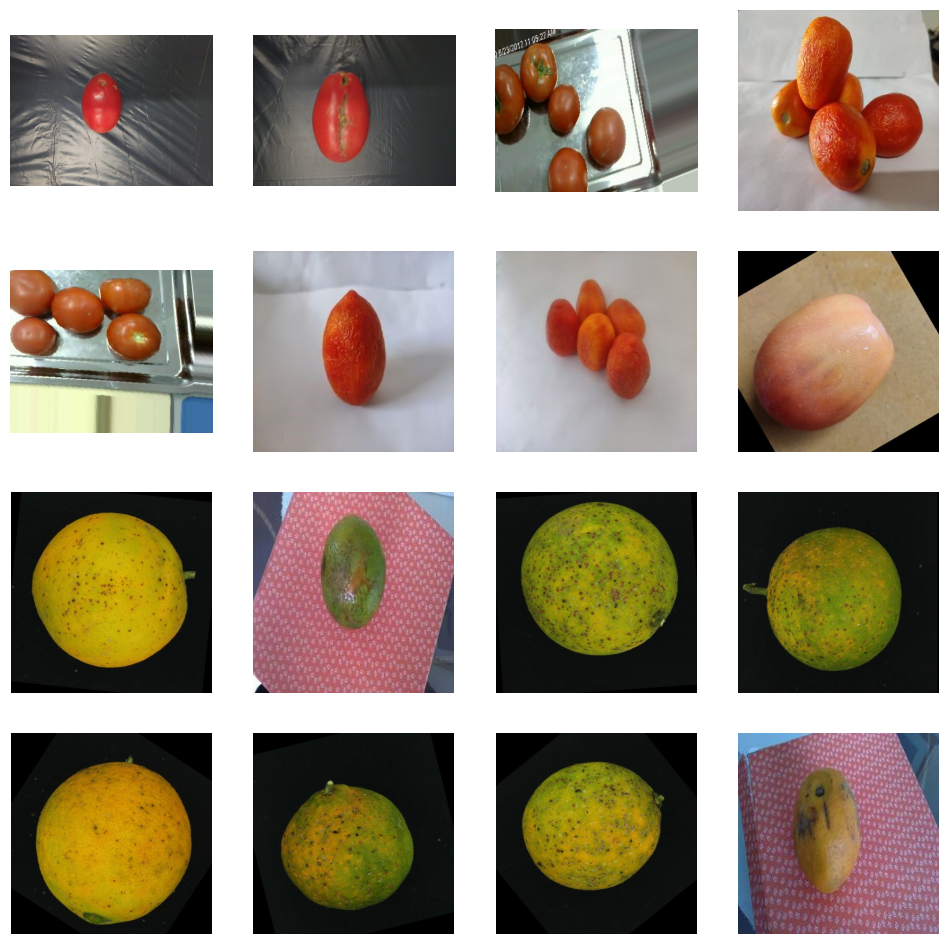

In [12]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Add a line break here

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

next_tomatsegarsedang_pix = [os.path.join(train_tomatsegarsedang_dir, fname)
                            for fname in train_tomatsegarsedang_fnames[pic_index - 8:pic_index]
                            ]

next_jeruksegarsedang_pix = [os.path.join(train_jeruksegarsedang_dir, fname)
                            for fname in train_jeruksegarsedang_fnames[pic_index - 8:pic_index]
                            ]

for i, img_path in enumerate(next_tomatsegarsedang_pix  + next_jeruksegarsedang_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#Make Augmentation

In [11]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs = 10

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5],
                                   channel_shift_range=0.2)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 15780 images belonging to 9 classes.
Found 6767 images belonging to 9 classes.


In [12]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Choose a specific layer for feature extraction
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)  # Adjust the number of output classes

model = Model(base_model.input, x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [13]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

Epoch 1/10
127/789 [===>..........................] - ETA: 4:22 - loss: 5.6641 - accuracy: 0.5354

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


789/789 [==============================] - 369s 452ms/step - loss: 2.8135 - accuracy: 0.7006 - val_loss: 2.4840 - val_accuracy: 0.5472
Epoch 2/10
789/789 [==============================] - 348s 440ms/step - loss: 1.4547 - accuracy: 0.7865 - val_loss: 2.0447 - val_accuracy: 0.4900
Epoch 3/10
789/789 [==============================] - 344s 436ms/step - loss: 1.2271 - accuracy: 0.8049 - val_loss: 1.9248 - val_accuracy: 0.5849
Epoch 4/10
789/789 [==============================] - 349s 443ms/step - loss: 1.1241 - accuracy: 0.8125 - val_loss: 1.7803 - val_accuracy: 0.6004
Epoch 5/10
789/789 [==============================] - 339s 430ms/step - loss: 1.1179 - accuracy: 0.8098 - val_loss: 2.0203 - val_accuracy: 0.4980
Epoch 6/10
789/789 [==============================] - 337s 428ms/step - loss: 1.1079 - accuracy: 0.8152 - val_loss: 2.3032 - val_accuracy: 0.4730
Epoch 7/10
789/789 [==============================] - 344s 435ms/step - loss: 1.1430 - accuracy: 0.8041 - val_loss: 2.0858 - val_accura

339/339 [==============================] - 42s 122ms/step


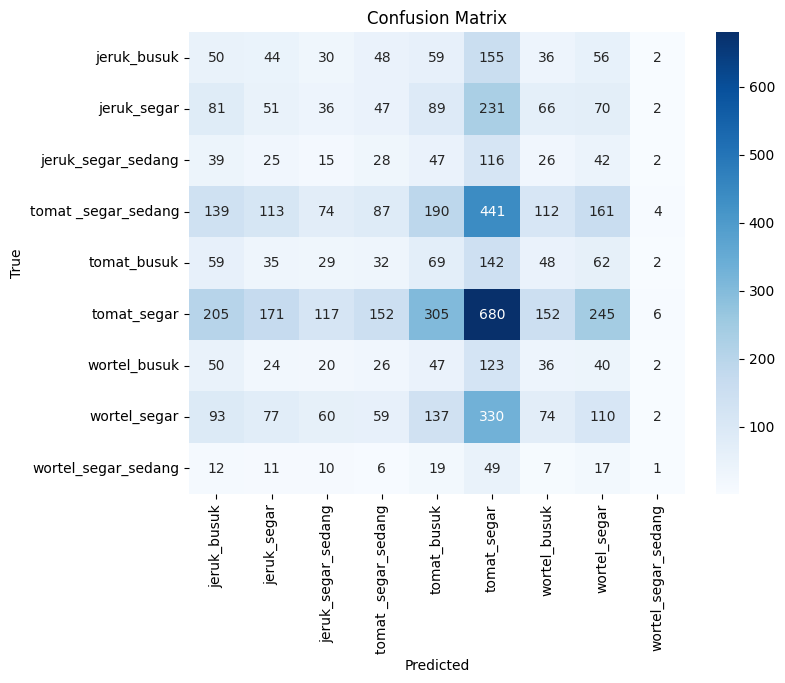


Classification Report:
                      precision    recall  f1-score   support

        jeruk_busuk       0.07      0.10      0.08       480
        jeruk_segar       0.09      0.08      0.08       673
 jeruk_segar_sedang       0.04      0.04      0.04       340
tomat _segar_sedang       0.18      0.07      0.10      1321
        tomat_busuk       0.07      0.14      0.10       478
        tomat_segar       0.30      0.33      0.32      2033
       wortel_busuk       0.06      0.10      0.08       368
       wortel_segar       0.14      0.12      0.13       942
wortel_segar_sedang       0.04      0.01      0.01       132

           accuracy                           0.16      6767
          macro avg       0.11      0.11      0.10      6767
       weighted avg       0.17      0.16      0.16      6767



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# ...

# Setelah Anda melatih model, lakukan prediksi pada data uji
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label yang benar
y_true = test_generator.classes

# Buat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Text(0.5, 1.0, 'Training and validation loss')

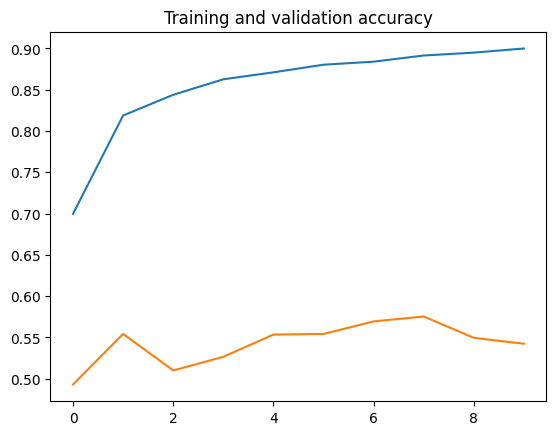

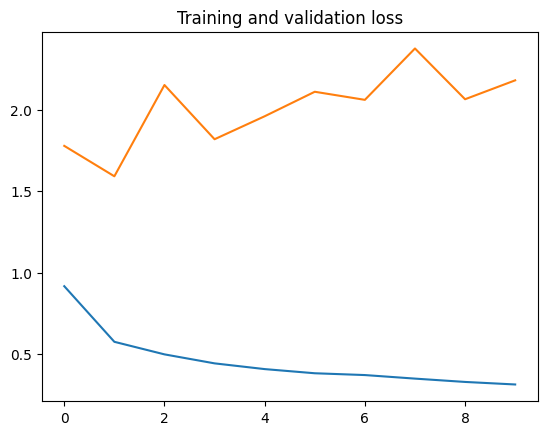

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Model Description Experiment :

1. CNN-3(Trainacc=98 Valacc=43 time=10m25s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
2. RestNet50(Trainacc=69,60 valacc=24,35 time=8m51s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
3. MobileNet(Trainacc=96,89 valacc=52,10 time=11m45s)
   * epoch 10
   * batch size 20
   * augmentation rescale, horizontal flip,vertical flip,zoom range 0.2, fill mode nearest(train) and rescale,zoom range (val)
   * dropout(0,5)
4. MobileNet V2(Train Accuracy=96 val=54 time=23m)
   * input size 224 x 224
   * new dataset
   * double drop out (0,2)